# Explain social_p and social_r statistically



In [66]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [67]:
# Import plotting routines
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

---

In [68]:
df_socprot = pd.read_csv('../git/resilience_indicator/df.csv', index_col='country')[['social_p', 'social_r','share1']]

# Get data from csvs created using pull_data.ipynb

In [69]:
df_social_protection=pd.read_csv('output/df_social_protection.csv', index_col=0)
df_social_protection.head(1)

,social_p,social_p cont. lin. est. from ILO,social_p piecewise lin. est. from ILO,social_r,social_r cont. lin. est. from ILO,social_r piecewise lin. est. from ILO,Total public social protection expenditure and health expenditure (% GDP),Public health care (% GDP),Public social protection (% GDP),year,sanity
Afghanistan,NaN,0.067445,0.146767,NaN,0.043729,0.135389,5.6,3.61,1.99,2011.0,0


## Get social_p and social_r

In [70]:
df_social = df_social_protection.drop(['social_p cont. lin. est. from ILO', 'social_p cont. lin. est. from ILO', 
                                     'social_r cont. lin. est. from ILO', 'social_r piecewise lin. est. from ILO',
                                     'social_p piecewise lin. est. from ILO', 'sanity', 'Public health care (% GDP)'],
                                     axis=1)
#Rename for easier coding
df_social.rename(columns={'Total public social protection expenditure and health expenditure (% GDP)':'ILO_total',
                         'Public social protection (% GDP)':'ILO_social'}, inplace=True)
df_social.head(1)

,social_p,social_r,ILO_total,ILO_social,year
Afghanistan,NaN,NaN,5.6,1.99,2011.0


## Get Political Stability

In [71]:
PV  = pd.read_csv('Datasets/WGI Political Stability and Violence.csv',  encoding='utf-8', index_col=0)
PV.head(2)

,PV_EST,PV_PER_RNK,PV_PER_RNK_UPPER,PV_STD_ERR
country,,,,
Afghanistan,-2.458067,2.912621,5.797101,0.221863
Albania,0.473255,61.650486,75.362320,0.204799


## Get Government Effectiveness

In [72]:
GE  = pd.read_csv('Datasets/WGI Government Effectiveness.csv',  encoding='utf-8', index_col=0)
GE.head(2)

,GE_EST,GE_PER_RNK,GE_PER_RNK_UPPER,GE_STD_ERR
country,,,,
Afghanistan,-1.344121,8.173077,16.746412,0.231331
Albania,-0.070645,51.923077,63.636364,0.214527


## Get Regulatory Quality

In [73]:
RQ  = pd.read_csv('Datasets/WGI Regulatory Quality.csv',  encoding='utf-8', index_col=0)
RQ.head(2)

,RQ_EST,RQ_PER_RNK,RQ_PER_RNK_UPPER,RQ_STD_ERR
country,,,,
Afghanistan,-1.126951,11.538462,23.923445,0.191011
Albania,0.225227,60.576923,68.899521,0.179676


## Get Corruption Index from Transparency International

In [74]:
#CPI = pd.read_csv('Datasets/CPI_2015.csv', index_col='country', encoding='utf-8')

## Get Remittances

In [75]:
rem = pd.read_csv('Datasets/WDI remittances.csv', index_col='country', encoding='utf-8')
rem.rename(columns={'BX.TRF.PWKR.DT.GD.ZS - pers. remittances received, % GDP':'remittance_gdp'}, inplace=True)
rem.rename(columns={'BX.TRF.PWKR.CD.DT - pers. remittances received, curr. US$':'remittance_usd'}, inplace=True)

## Get GDP

In [76]:
gdp = pd.read_csv('Datasets/GDP_pc_PPP.csv', index_col='country', encoding='utf-8')
gdp.rename(columns={'GDP per cap, PPP':'gdp'}, inplace=True)

## Get Country Income Categories

In [77]:
country_cat = pd.read_csv('Datasets/WB country_categories.csv', index_col='name', encoding='utf-8')[['incomeLevel','region']]
country_cat['is_eca']=country_cat['region']=="Europe & Central Asia (all income levels)"

In [78]:
#country_income_dict = {'Low income':'low','Lower middle income':'middle','Upper middle income':'middle',
#                       'High income: nonOECD':'high', 'High income: OECD':'high'}
#country_income = pd.DataFrame(country_cat)
#country_income.replace(country_income_dict, inplace=True)
#country_income.rename(columns={'incomeLevel':'income'}, inplace=True)

## Get Gini Coefficient

In [79]:
gini = pd.read_csv('Datasets/WDI GINI.csv', index_col='country', encoding='utf-8')
gini.rename(columns={'SI.POV.GINI - Gini Index':'gini'}, inplace=True)

## Former Sovjet Republic?

In [80]:
fsr = ['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Estonia',
 'Georgia', 'Hungary', 'Kazakhstan', 'Kosovo', 'Kyrgyz Republic', 'Latvia', 'Lithuania', 'Macedonia, FYR', 'Moldova',
 'Montenegro', 'Poland', 'Romania', 'Russian Federation', 'Serbia', 'Slovak Republic', 'Slovenia', 'Tajikistan',
 'Turkmenistan', 'Uzbekistan']

## Merge these datasets into a DataFrame df_stats

In [81]:
df_stats = pd.concat([df_social, df_socprot['share1'], PV, GE, RQ, rem, gdp, country_cat, gini], axis=1)
df_stats['FSR']=False
df_stats.ix[fsr,'FSR']=True
df_stats.drop(['Africa','Arab World','Andean Region', 'Caribbean small states', 'Central Europe and the Baltics',
               'Central America',
               'East Asia & Pacific (all income levels)', 'East Asia & Pacific (developing only)',
               'East Asia and the Pacific (IFC classification)', 'Euro area',
               'Fragile and conflict affected situations',
               'Europe & Central Asia (all income levels)', 'Europe & Central Asia (developing only)',
               'Europe and Central Asia (IFC classification)', 'European Union',
               'Sub-Saharan Africa (IFC classification)', 'Sub-Saharan Africa (all income levels)',
               'Sub-Saharan Africa (developing only)', 'Sub-Saharan Africa excluding South Africa',
               'Sub-Saharan Africa excluding South Africa and Nigeria', 'South Asia (IFC classification)',
               'Southern Cone', 'Turks and Caicos Islands',
               'Oceania', 'Other small states', 'Small States',
               'Pacific island small states', 'Heavily indebted poor countries (HIPC)', 'High income',
               'High income: OECD', 'High income: nonOECD', 'Latin America & Caribbean (all income levels)',
               'Latin America & Caribbean (developing only)', 'Latin America and the Caribbean',
               'Latin America and the Caribbean (IFC classification)', 'Least developed countries: UN classification',
               'Middle East & North Africa (all income levels)',
               'Middle East & North Africa (developing only)','Middle East (developing only)',
               'Middle East and North Africa (IFC classification)', 'Middle East & North Africa (all income levels)',
               'Middle income', 'North Africa', 'North America', 'Not classified', 'OECD members',
               'Low & middle income', 'Low income', 'Lower middle income', 'Upper middle income','World'],
              axis=0, errors='ignore', inplace=True)

In [82]:
income_level_to_color = {'Low income':'red','Lower middle income':'orange','Upper middle income':'yellow',
                       'High income: nonOECD':'green', 'High income: OECD':'blue'}

In [83]:
income_colors=pd.DataFrame(df_stats['incomeLevel'])
income_colors.replace(income_level_to_color, inplace=True)

In [84]:
df_stats_fsr = (df_stats[df_stats.FSR==True]).copy()
df_stats_nofsr = (df_stats[df_stats.FSR==False]).copy()

# Statistical Analyses
Add share_1 to see how big the inequalities are on this.

In [85]:
formula1 ='social_p ~ np.log(ILO_social) + GE_EST + remittance_gdp'
required_columns = [c for c in df_stats.columns if c in formula1]
fig = plt.figure(figsize=(20,40))
regress_p1 = smf.ols(formula=formula1, data=df_stats).fit()
regress_p1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               social_p   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     34.26
Date:                Fri, 10 Jun 2016   Prob (F-statistic):           1.30e-14
Time:                        11:34:44   Log-Likelihood:                 33.290
No. Observations:                  89   AIC:                            -58.58
Df Residuals:                      85   BIC:                            -48.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.1746      0.038      4.634      0.000         0.100     0.250
np.log(ILO_social)     0.0859      0.021      4.114      0.000         0.044     0.127
GE_EST                 0.1148      0.029      3.985      0.000         0.058     0.172
remittance_gdp         0.0051      0.003      1.712      0.091        -0.001     0.011
==============================================================================
Omnibus:                       19.584   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.418
Skew:                           1.107   Prob(JB):                     4.98e-06
Kurtosis:                       4.298   Cond. No.                         20.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

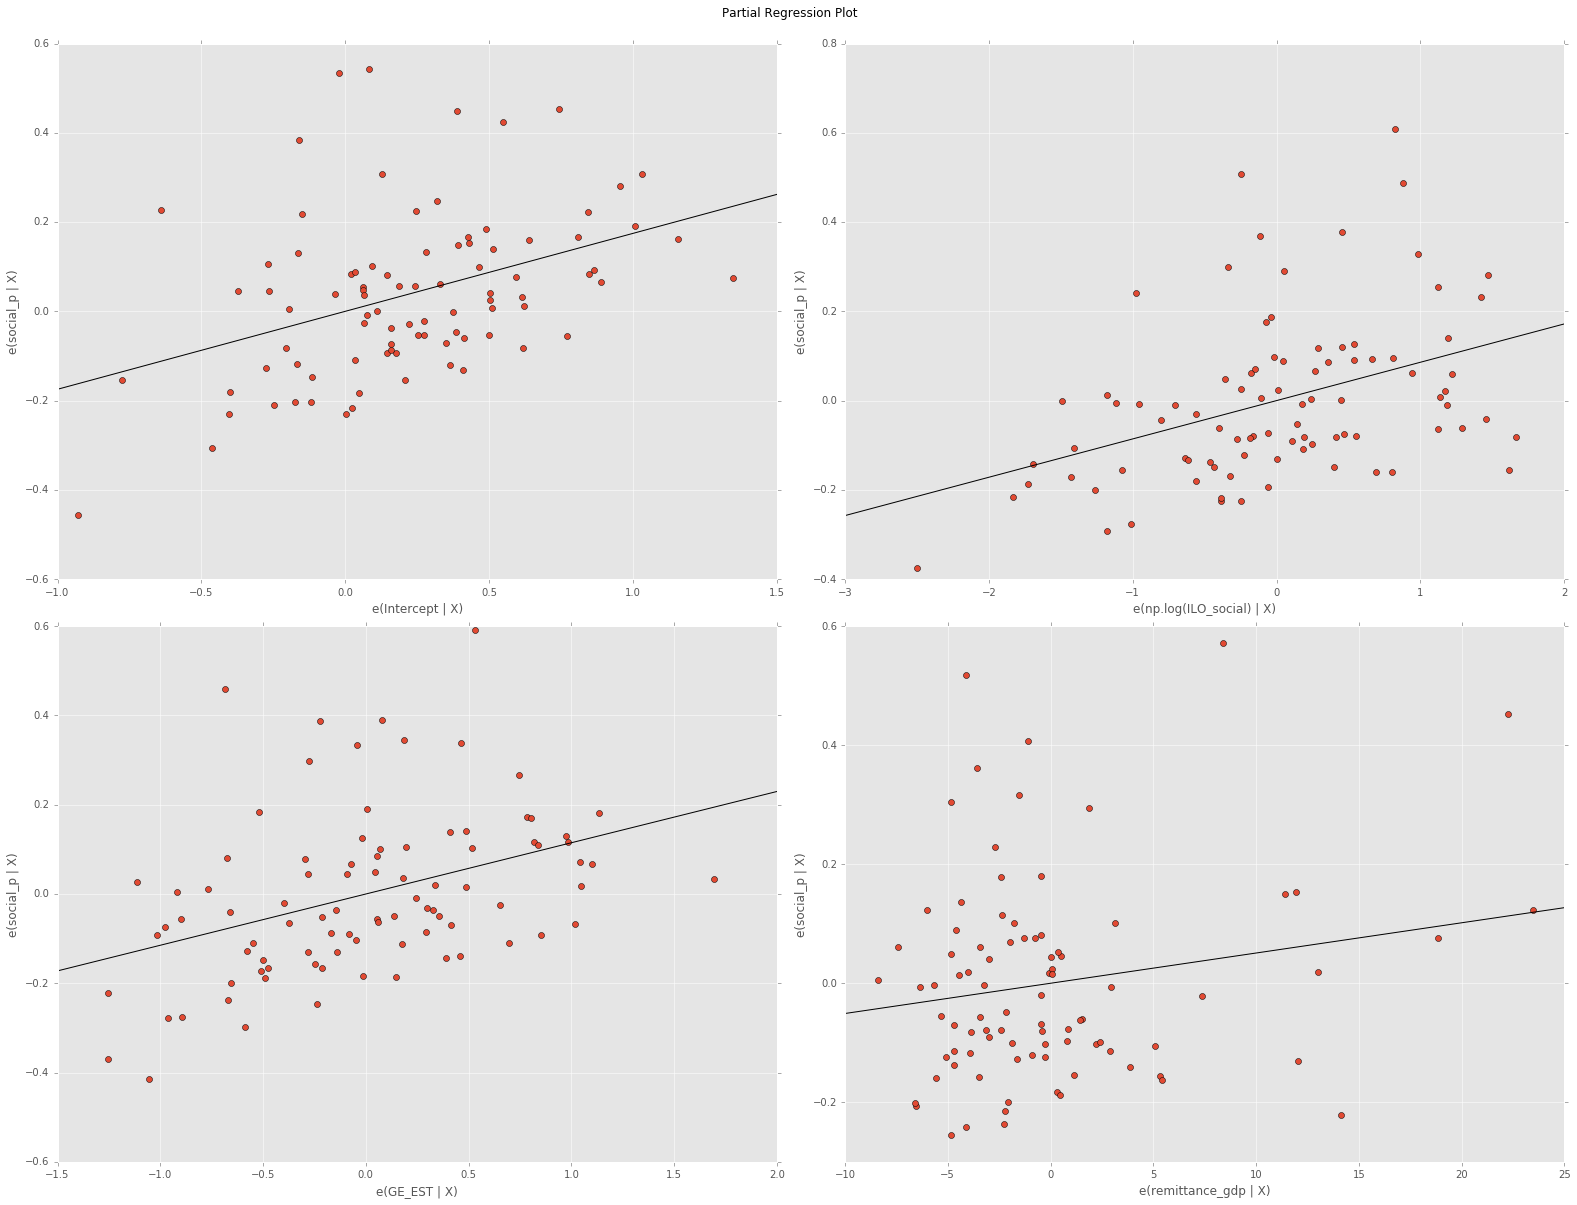

In [86]:
fig=plt.figure(figsize=(22,17))
plot = sm.graphics.plot_partregress_grid(regress_p1,fig=fig)
fig.savefig('regress_p1.pdf', format = 'pdf')

In [87]:
formula2='social_p ~ np.log(ILO_social) + GE_EST + remittance_gdp + FSR'
regress_p2 = smf.ols(formula=formula2, data=df_stats).fit()
regress_p2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               social_p   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     39.08
Date:                Fri, 10 Jun 2016   Prob (F-statistic):           1.89e-18
Time:                        11:34:46   Log-Likelihood:                 44.800
No. Observations:                  89   AIC:                            -79.60
Df Residuals:                      84   BIC:                            -67.16
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.2047      0.034      6.047      0.000         0.137     0.272
FSR[T.True]            0.2249      0.045      4.979      0.000         0.135     0.315
np.log(ILO_social)     0.0486      0.020      2.438      0.017         0.009     0.088
GE_EST                 0.1301      0.026      5.071      0.000         0.079     0.181
remittance_gdp         0.0015      0.003      0.533      0.595        -0.004     0.007
==============================================================================
Omnibus:                        8.551   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.270
Skew:                           0.721   Prob(JB):                       0.0160
Kurtosis:                       3.391   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

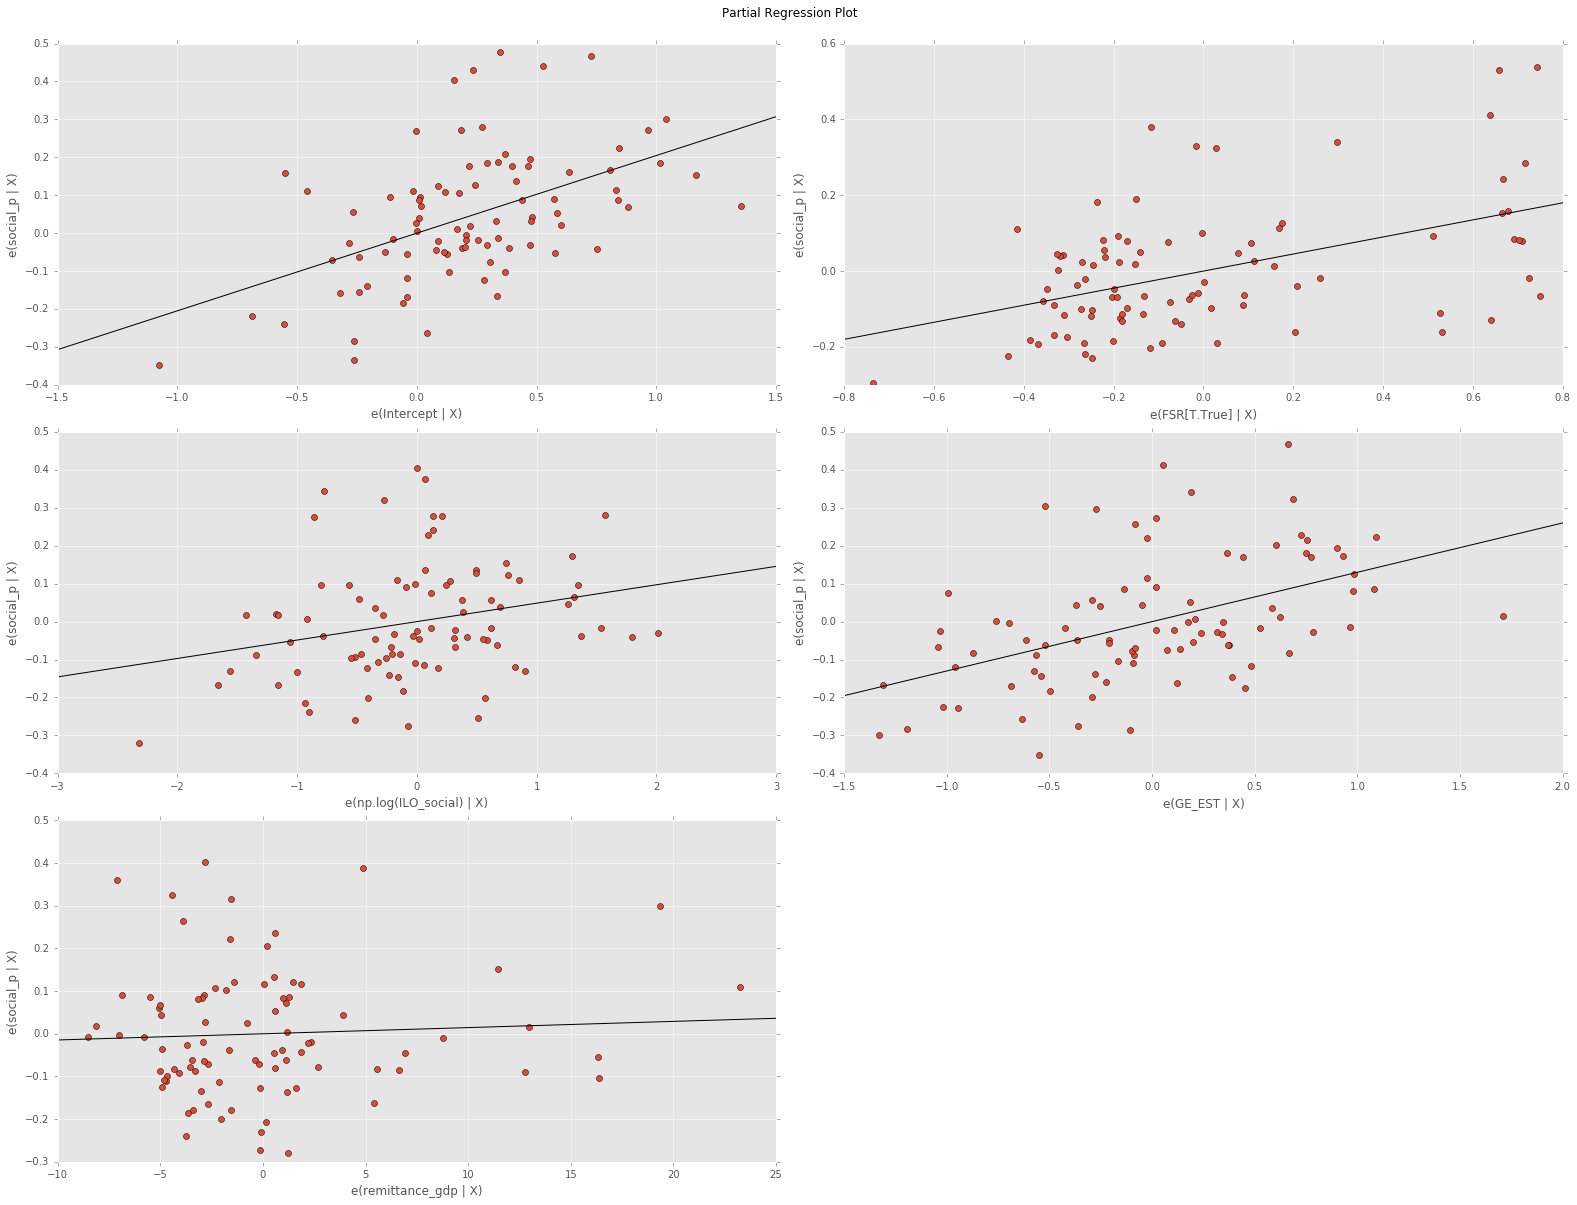

In [88]:
fig=plt.figure(figsize=(22,17))
plot = sm.graphics.plot_partregress_grid(regress_p2, fig=fig)
fig.savefig('regress_p2.pdf', format = 'pdf')

In [89]:
formula2_nofsr='social_p ~ np.log(ILO_social) + GE_EST + remittance_gdp + FSR'
regress_p2_nofsr = smf.ols(formula=formula2, data=df_stats_nofsr).fit()
regress_p2_nofsr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               social_p   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     43.84
Date:                Fri, 10 Jun 2016   Prob (F-statistic):           8.53e-16
Time:                        11:34:48   Log-Likelihood:                 46.369
No. Observations:                  71   AIC:                            -84.74
Df Residuals:                      67   BIC:                            -75.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.2055      0.031      6.719      0.000         0.144     0.267
FSR[T.True]         4.782e-17   8.65e-18      5.528      0.000      3.06e-17  6.51e-17
np.log(ILO_social)     0.0527      0.018      2.973      0.004         0.017     0.088
GE_EST                 0.1278      0.023      5.449      0.000         0.081     0.175
remittance_gdp        -0.0002      0.003     -0.076      0.940        -0.006     0.006
==============================================================================
Omnibus:                       10.370   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.244
Skew:                           0.858   Prob(JB):                      0.00596
Kurtosis:                       3.718   Cond. No.                     9.25e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.01e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [90]:
formula2_fsr='social_p ~ np.log(ILO_social) + GE_EST + remittance_gdp + FSR'
regress_p2_fsr = smf.ols(formula=formula2, data=df_stats_fsr).fit()
regress_p2_fsr.summary()

/Users/steffen/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               social_p   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.9279
Date:                Fri, 10 Jun 2016   Prob (F-statistic):              0.453
Time:                        11:34:48   Log-Likelihood:                 4.5474
No. Observations:                  18   AIC:                            -1.095
Df Residuals:                      14   BIC:                             2.467
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.5742      0.232      2.479      0.027         0.077     1.071
FSR[T.True]            0.5742      0.232      2.479      0.027         0.077     1.071
np.log(ILO_social)    -0.2401      0.182     -1.322      0.207        -0.630     0.149
GE_EST                 0.1431      0.108      1.322      0.207        -0.089     0.375
remittance_gdp        -0.0012      0.008     -0.153      0.881        -0.018     0.016
==============================================================================
Omnibus:                        0.005   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.997   Jarque-Bera (JB):                0.166
Skew:                          -0.033   Prob(JB):                        0.920
Kurtosis:                       2.534   Cond. No.                     4.99e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [91]:
formula3='social_p ~ np.log(ILO_social) + GE_EST + FSR'
regress_p3 = smf.ols(formula=formula3, data=df_stats).fit()
regress_p3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               social_p   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     52.46
Date:                Fri, 10 Jun 2016   Prob (F-statistic):           2.75e-19
Time:                        11:34:48   Log-Likelihood:                 44.649
No. Observations:                  89   AIC:                            -81.30
Df Residuals:                      85   BIC:                            -71.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.2100      0.032      6.512      0.000         0.146     0.274
FSR[T.True]            0.2314      0.043      5.339      0.000         0.145     0.318
np.log(ILO_social)     0.0489      0.020      2.468      0.016         0.010     0.088
GE_EST                 0.1258      0.024      5.182      0.000         0.078     0.174
==============================================================================
Omnibus:                        8.385   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.095
Skew:                           0.715   Prob(JB):                       0.0175
Kurtosis:                       3.369   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

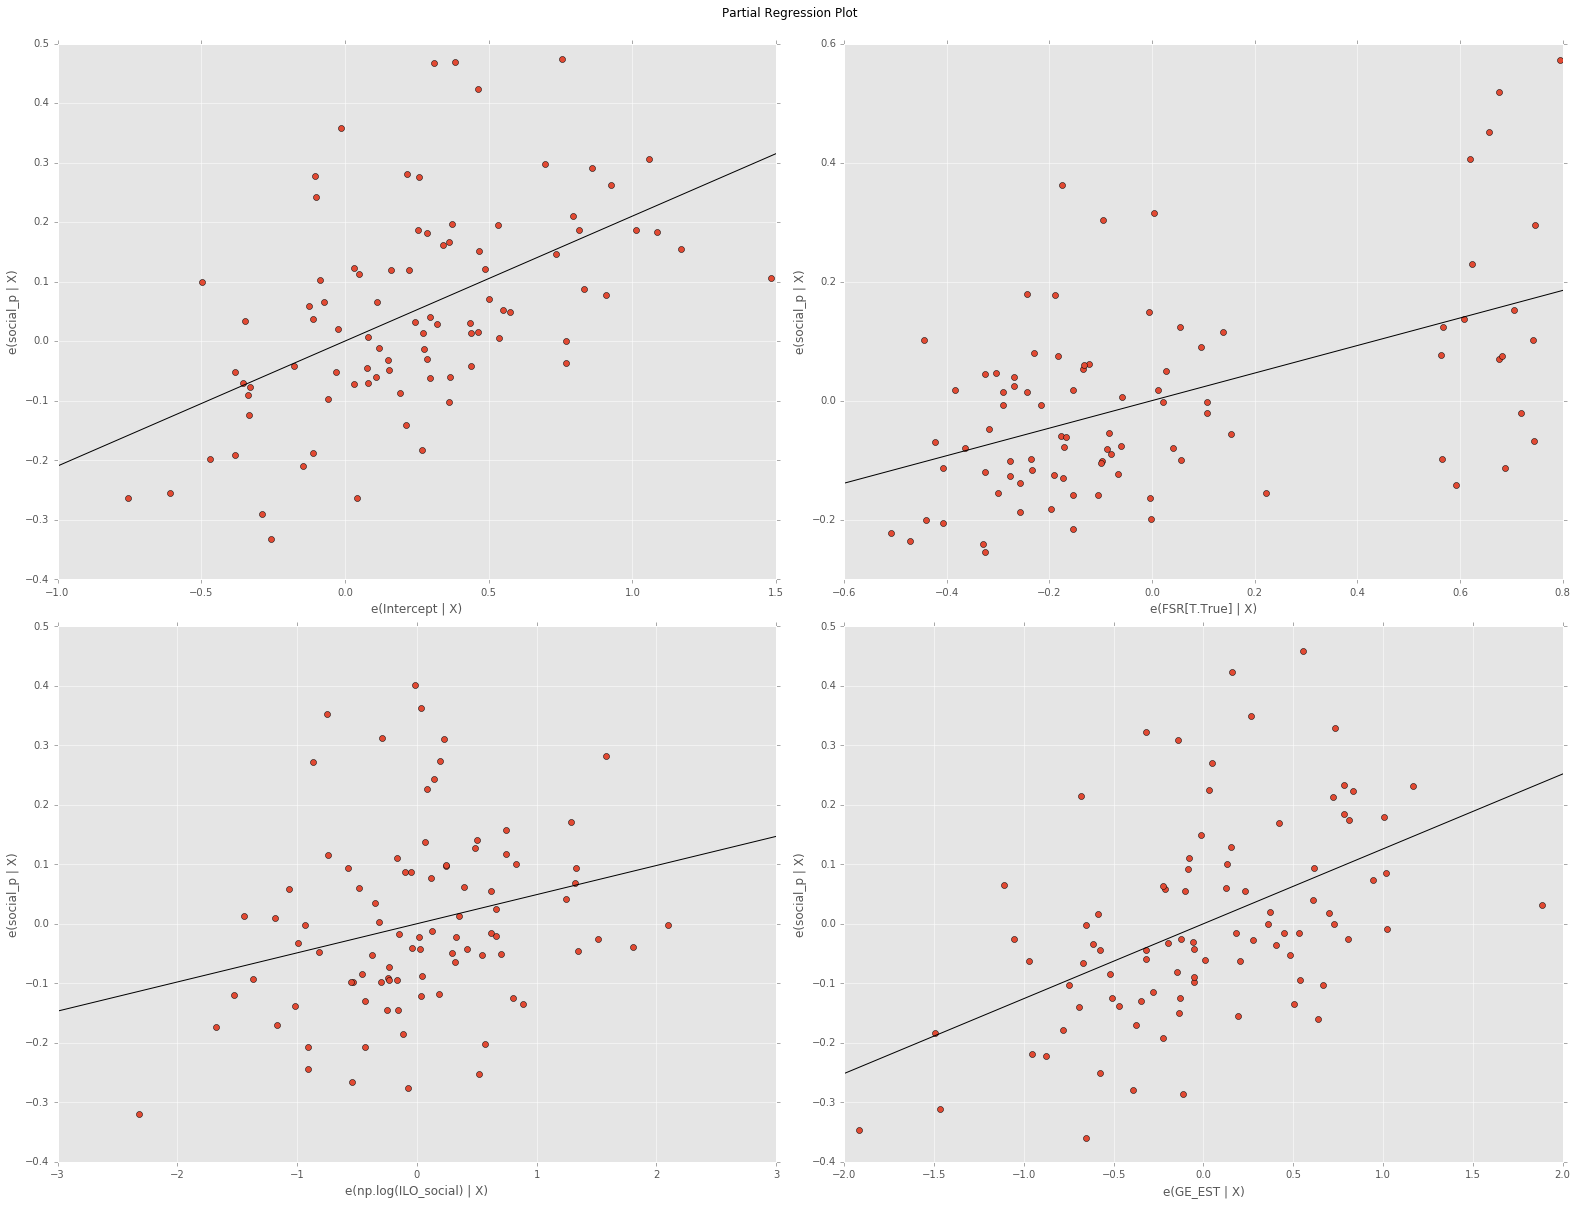

In [92]:
fig=plt.figure(figsize=(22,17))
plot = sm.graphics.plot_partregress_grid(regress_p3, fig=fig)
fig.savefig('regress_p3.pdf', format = 'pdf')

In [93]:
formula4='social_p ~ ILO_social + np.square(ILO_social) + GE_EST + region'
regress_p4 = smf.ols(formula=formula4, data=df_stats).fit()
regress_p4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               social_p   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     16.53
Date:                Fri, 10 Jun 2016   Prob (F-statistic):           6.55e-15
Time:                        11:34:51   Log-Likelihood:                 45.135
No. Observations:                  89   AIC:                            -70.27
Df Residuals:                      79   BIC:                            -45.38
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    0.2191      0.045      4.823      0.000         0.129     0.309
region[T.East Asia & Pacific (all income levels)]           -0.0495      0.054     -0.914      0.363        -0.157     0.058
region[T.Europe & Central Asia (all income levels)]          0.2551      0.052      4.945      0.000         0.152     0.358
region[T.Latin America & Caribbean (all income levels)]      0.0029      0.042      0.070      0.945        -0.080     0.086
region[T.Middle East & North Africa (all income levels)]    -0.0573      0.077     -0.747      0.457        -0.210     0.095
region[T.North America]                                      0.1786      0.111      1.608      0.112        -0.043     0.400
region[T.South Asia]                                        -0.0824      0.075     -1.096      0.276        -0.232     0.067
region[T.Sub-Saharan Africa (all income levels)]            -0.0283      0.044     -0.642      0.523        -0.116     0.059
ILO_social                                                   0.0173      0.011      1.516      0.133        -0.005     0.040
np.square(ILO_social)                                       -0.0010      0.000     -2.116      0.038        -0.002 -5.79e-05
GE_EST                                                       0.1000      0.031      3.231      0.002         0.038     0.162
==============================================================================
Omnibus:                       13.384   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.866
Skew:                           0.830   Prob(JB):                     0.000591
Kurtosis:                       4.120   Cond. No.                     2.28e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  6e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

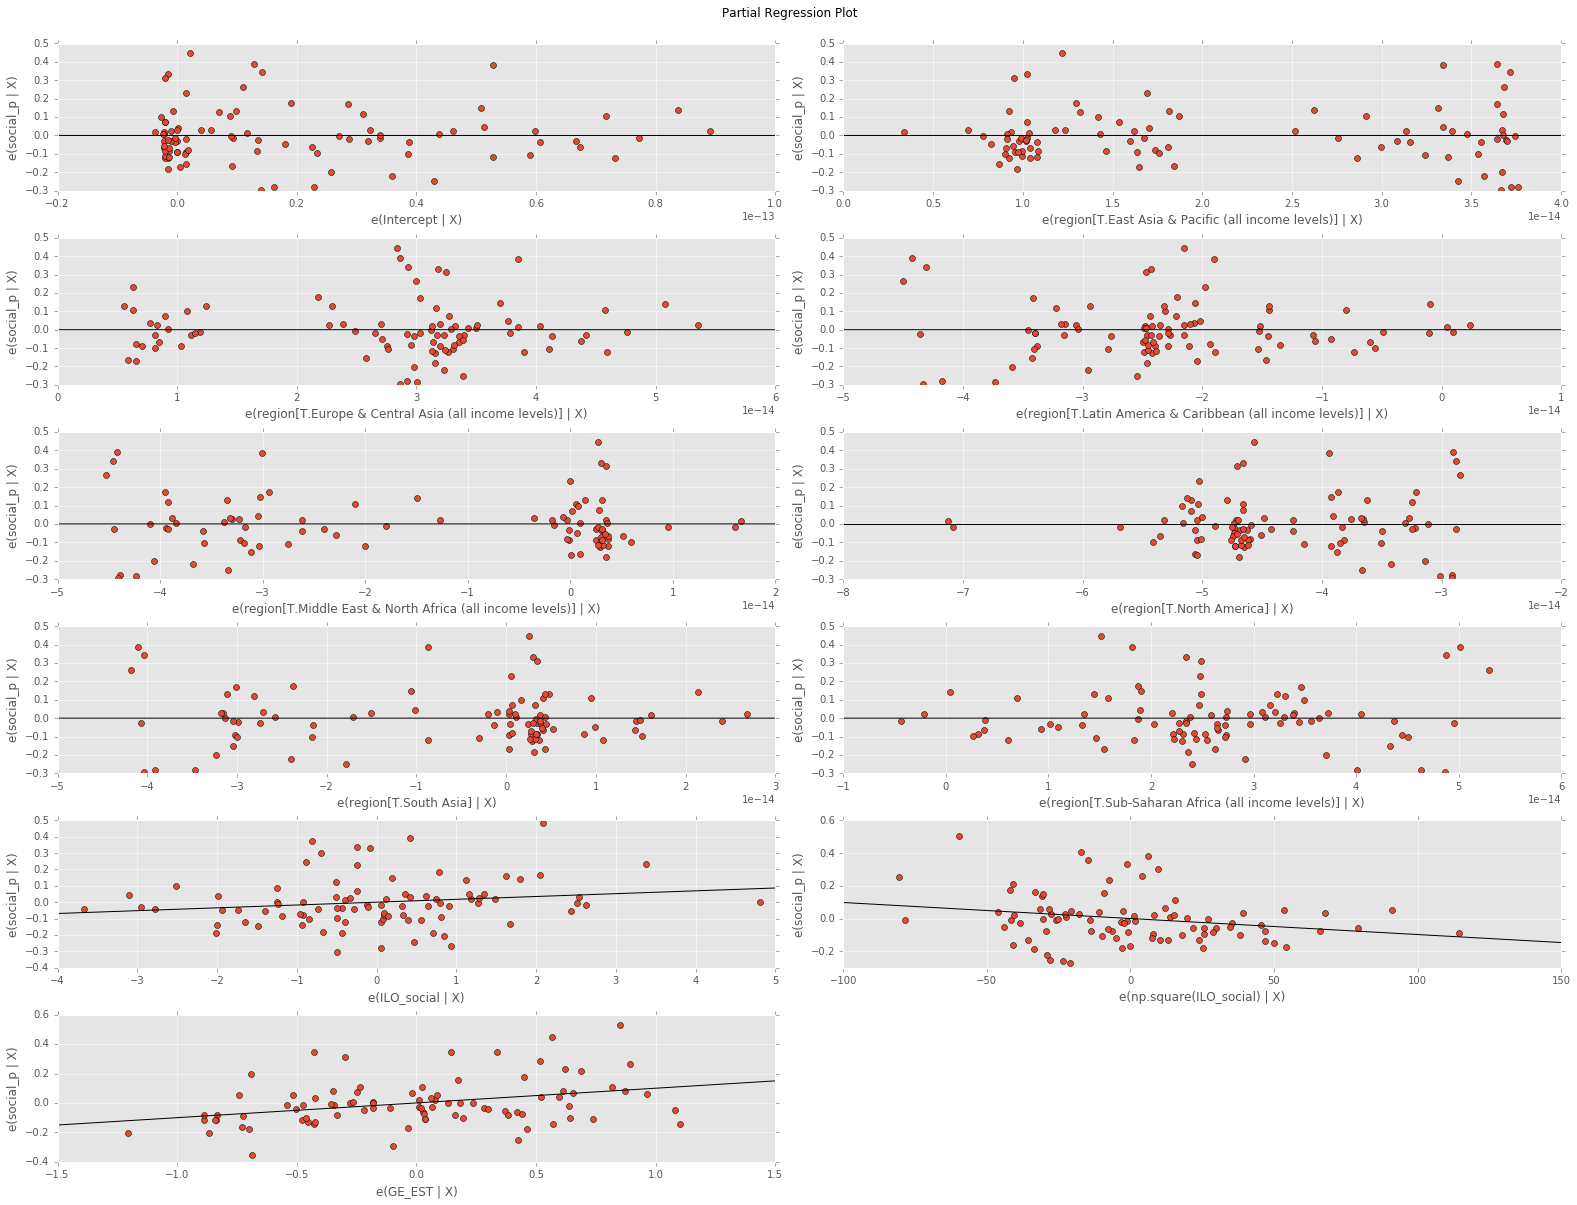

In [94]:
figure = plt.figure(figsize=(22,17))
sm.graphics.plot_partregress_grid(regress_p4, fig=figure)
figure.savefig('regress_p4.pdf', format = 'pdf')

## Prediction table
Which countries can be predicted with the "best" regressions

Countries without social_p:

In [95]:
len(df_stats.index)

230

In [96]:
countries_social_p = df_stats[df_stats.social_p.notnull()]
len(countries_social_p.index)

90

In [97]:
countries_no_social_p = df_stats[df_stats.social_p.isnull()]
len(countries_no_social_p.index)

140

For regression 1 for social_p predicted with ILO_social, GE_EST and remittance_gdp:

No Government Effectiveness data

In [98]:
countries_no_social_p[countries_no_social_p.GE_EST.isnull()].index

Index(['Cape Verde', 'Channel Islands', 'Curacao', 'Faeroe Islands',
       'Faroe Islands', 'French Polynesia', 'Isle of Man',
       'Korea, Dem. People’s Rep.', 'Monaco', 'New Caledonia',
       'Northern Mariana Islands', 'San Marino', 'Sint Maarten (Dutch part)',
       'Small states', 'South Asia', 'St. Martin (French part)',
       'São Tomé and Príncipe', 'Taiwan'],
      dtype='object')

No remittance data

In [99]:
countries_no_social_p[countries_no_social_p.remittance_gdp.isnull()].index

Index(['American Samoa', 'Andorra', 'Anguilla', 'Bahamas, The', 'Bahrain',
       'Brunei Darussalam', 'Cabo Verde', 'Cayman Islands', 'Channel Islands',
       'Cook Islands', 'Cuba', 'Curacao', 'Faroe Islands', 'French Guiana',
       'French Polynesia', 'Greenland', 'Guam', 'Isle of Man',
       'Jersey, Channel Islands', 'Korea, Dem. People’s Rep.',
       'Korea, Dem. Rep.', 'Liechtenstein', 'Martinique', 'Monaco', 'Nauru',
       'Netherlands Antilles', 'New Caledonia', 'Niue',
       'Northern Mariana Islands', 'Puerto Rico', 'Reunion', 'San Marino',
       'Sao Tome and Principe', 'Singapore', 'Sint Maarten (Dutch part)',
       'Somalia', 'South Sudan', 'St. Martin (French part)', 'Taiwan',
       'Taiwan, China', 'United Arab Emirates', 'Uzbekistan',
       'Virgin Islands (U.S.)'],
      dtype='object')

Remittance data but not Government Effeciteveness data

In [100]:
countries_no_social_p[countries_no_social_p.GE_EST.isnull() & countries_no_social_p.remittance_gdp.notnull()].index

Index(['Cape Verde', 'Faeroe Islands', 'Small states', 'South Asia',
       'São Tomé and Príncipe'],
      dtype='object')

Government Effeciteveness data but no remittance data

In [101]:
countries_no_social_p[countries_no_social_p.GE_EST.notnull() & countries_no_social_p.remittance_gdp.isnull()].index

Index(['American Samoa', 'Andorra', 'Anguilla', 'Bahamas, The', 'Bahrain',
       'Brunei Darussalam', 'Cabo Verde', 'Cayman Islands', 'Cook Islands',
       'Cuba', 'French Guiana', 'Greenland', 'Guam', 'Jersey, Channel Islands',
       'Korea, Dem. Rep.', 'Liechtenstein', 'Martinique', 'Nauru',
       'Netherlands Antilles', 'Niue', 'Puerto Rico', 'Reunion',
       'Sao Tome and Principe', 'Singapore', 'Somalia', 'South Sudan',
       'Taiwan, China', 'United Arab Emirates', 'Uzbekistan',
       'Virgin Islands (U.S.)'],
      dtype='object')

Neither Government Effectiveness nor remittance data available

In [102]:
countries_no_social_p[countries_no_social_p.GE_EST.isnull() & countries_no_social_p.remittance_gdp.isnull()].index

Index(['Channel Islands', 'Curacao', 'Faroe Islands', 'French Polynesia',
       'Isle of Man', 'Korea, Dem. People’s Rep.', 'Monaco', 'New Caledonia',
       'Northern Mariana Islands', 'San Marino', 'Sint Maarten (Dutch part)',
       'St. Martin (French part)', 'Taiwan'],
      dtype='object')

Countries without social_p, but with government effectiveness and remittance data. These countries are the ones which can be predicted with regression 1

In [103]:
countries_regress1 = countries_no_social_p[countries_no_social_p.GE_EST.notnull() &
                                           countries_no_social_p.remittance_gdp.notnull() &
                                           countries_no_social_p.ILO_social.notnull()]

In [104]:
formula1

'social_p ~ np.log(ILO_social) + GE_EST + remittance_gdp'

In [105]:
regress_p1.params

Intercept             0.174644
np.log(ILO_social)    0.085892
GE_EST                0.114831
remittance_gdp        0.005080
dtype: float64

In [106]:
df_stats['social_p_est1'] = (regress_p1.params['Intercept'] +
                 regress_p1.params['np.log(ILO_social)']*np.log(df_stats['ILO_social'])+
                 regress_p1.params['GE_EST']*df_stats['GE_EST']+
                 regress_p1.params['remittance_gdp']*df_stats['remittance_gdp'])

In [107]:
formula2

'social_p ~ np.log(ILO_social) + GE_EST + remittance_gdp + FSR'

In [108]:
regress_p2.params

Intercept             0.204727
FSR[T.True]           0.224915
np.log(ILO_social)    0.048560
GE_EST                0.130073
remittance_gdp        0.001451
dtype: float64

In [109]:
df_stats['social_p_est2'] = (regress_p2.params['Intercept'] +
                 regress_p2.params['FSR[T.True]']*(df_stats['FSR']==True)+
                 regress_p2.params['np.log(ILO_social)']*np.log(df_stats['ILO_social']) +
                 regress_p2.params['GE_EST']*df_stats['GE_EST']+
                 regress_p2.params['remittance_gdp']*df_stats['remittance_gdp'])

In [110]:
regress_p2_nofsr.params

Intercept             2.055460e-01
FSR[T.True]           4.782064e-17
np.log(ILO_social)    5.269089e-02
GE_EST                1.277834e-01
remittance_gdp       -2.202270e-04
dtype: float64

In [111]:
df_stats['social_p_est2_nofsr'] = (regress_p2_nofsr.params['Intercept'] +
                 regress_p2_nofsr.params['FSR[T.True]']*(df_stats_nofsr['FSR']==True)+
                 regress_p2_nofsr.params['np.log(ILO_social)']*np.log(df_stats_nofsr['ILO_social']) +
                 regress_p2_nofsr.params['GE_EST']*df_stats_nofsr['GE_EST']+
                 regress_p2_nofsr.params['remittance_gdp']*df_stats_nofsr['remittance_gdp'])

In [112]:
regress_p2_fsr.params

Intercept             0.574232
FSR[T.True]           0.574232
np.log(ILO_social)   -0.240073
GE_EST                0.143129
remittance_gdp       -0.001192
dtype: float64

In [113]:
df_stats['social_p_est2_fsr'] = (regress_p2_fsr.params['Intercept'] +
                 regress_p2_fsr.params['FSR[T.True]']*(df_stats_fsr['FSR']==True)+
                 regress_p2_fsr.params['np.log(ILO_social)']*np.log(df_stats_fsr['ILO_social']) +
                 regress_p2_fsr.params['GE_EST']*df_stats_fsr['GE_EST']+
                 regress_p2_fsr.params['remittance_gdp']*df_stats_fsr['remittance_gdp'])

In [114]:
regress_p3.params

Intercept             0.209991
FSR[T.True]           0.231362
np.log(ILO_social)    0.048927
GE_EST                0.125832
dtype: float64

In [115]:
df_stats['social_p_est3'] = (regress_p3.params['Intercept'] +
                 regress_p3.params['FSR[T.True]']*(df_stats['FSR']==True)+
                 regress_p3.params['np.log(ILO_social)']*np.log(df_stats['ILO_social']) +
                 regress_p3.params['GE_EST']*df_stats['GE_EST'])

In [116]:
regress_p4.params

Intercept                                                   0.219084
region[T.East Asia & Pacific (all income levels)]          -0.049543
region[T.Europe & Central Asia (all income levels)]         0.255117
region[T.Latin America & Caribbean (all income levels)]     0.002918
region[T.Middle East & North Africa (all income levels)]   -0.057259
region[T.North America]                                     0.178552
region[T.South Asia]                                       -0.082433
region[T.Sub-Saharan Africa (all income levels)]           -0.028268
ILO_social                                                  0.017322
np.square(ILO_social)                                      -0.000979
GE_EST                                                      0.100034
dtype: float64

In [117]:
df_stats['social_p_est4'] = (regress_p4.params['Intercept'] +
    regress_p4.params['region[T.East Asia & Pacific (all income levels)]']*(df_stats['region']=='East Asia & Pacific (all income levels)')+
    regress_p4.params['region[T.Europe & Central Asia (all income levels)]']*(df_stats['region']=='Europe & Central Asia (all income levels)')+
    regress_p4.params['region[T.Middle East & North Africa (all income levels)]']*(df_stats['region']=='Middle East & North Africa (all income levels)')+
    regress_p4.params['region[T.North America]']*(df_stats['region']=='North America')+
    regress_p4.params['region[T.South Asia]']*(df_stats['region']=='South Asia')+
    regress_p4.params['region[T.Sub-Saharan Africa (all income levels)]']*(df_stats['region']=='Sub-Saharan Africa (all income levels)')+    
    regress_p4.params['ILO_social']*df_stats['ILO_social']+
    regress_p4.params['np.square(ILO_social)']*df_stats['ILO_social']**2+
    regress_p4.params['GE_EST']*df_stats['GE_EST'])
#                 regress_p2.params['remittance_gdp']*df_stats['remittance_gdp'])

# Graphical Output

In [118]:
regress_p2.fittedvalues['Albania']

0.53487552611854494

In [119]:
df_stats.social_p_est2.Albania

0.53487552611854494

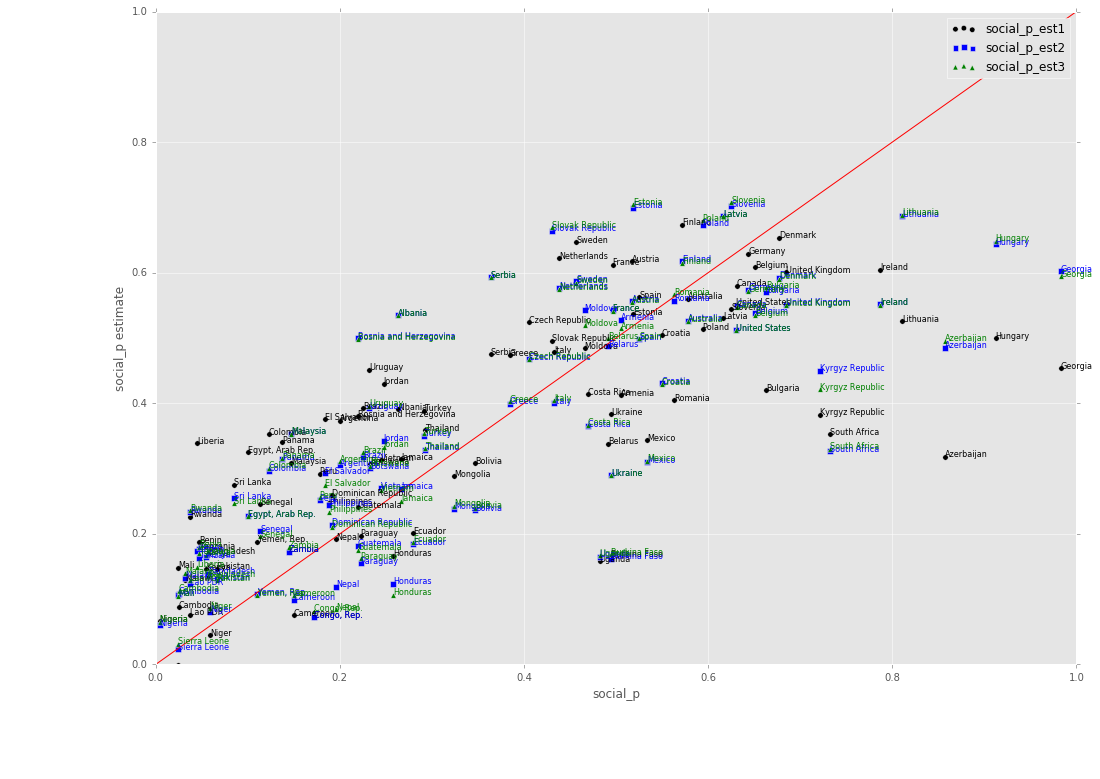

In [121]:
fig = plt.figure(figsize=[16.5,11.7])
plt.scatter(df_stats['social_p'], df_stats['social_p_est1'], marker = 'o', s=30, c='k')
plt.scatter(df_stats['social_p'], df_stats['social_p_est2'], marker = 's', s=30, c='b')
plt.scatter(df_stats['social_p'], df_stats['social_p_est3'], marker = '^', s=30, c='g')
#plt.scatter(df_stats['social_p'], df_stats['social_p_est2_nofsr'], marker = 'x', s=30, c='b')
#plt.scatter(df_stats['social_p'], df_stats['social_p_est2_fsr'], marker = '+', s=30, c='b')

plt.plot(np.linspace(0,1.2), np.linspace(0,1.2),'r-')
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'social_p_est1']],
                 s=k, xycoords='data', fontsize=8)
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'social_p_est2']],
                 s=k, xycoords='data', fontsize=8, color='b')
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'social_p_est3']],
                 s=k, xycoords='data', fontsize=8, color='g')
#for k in df_stats.index.values:
#    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'social_p_est2_nofsr']],
#                 s=k, xycoords='data', fontsize=6, color='k')
#for k in df_stats.index.values:
#    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'social_p_est2_fsr']],
#                 s=k, xycoords='data', fontsize=6, color='k')
    
    plt.xlim([0,1.0]), plt.ylim([0.,1.0])
plt.xlabel('social_p'), plt.ylabel('social_p estimate'), plt.legend()
plt.savefig('social_p-ILO_social_regress_p_comparison.pdf', format='pdf', bbox_inches='tight')

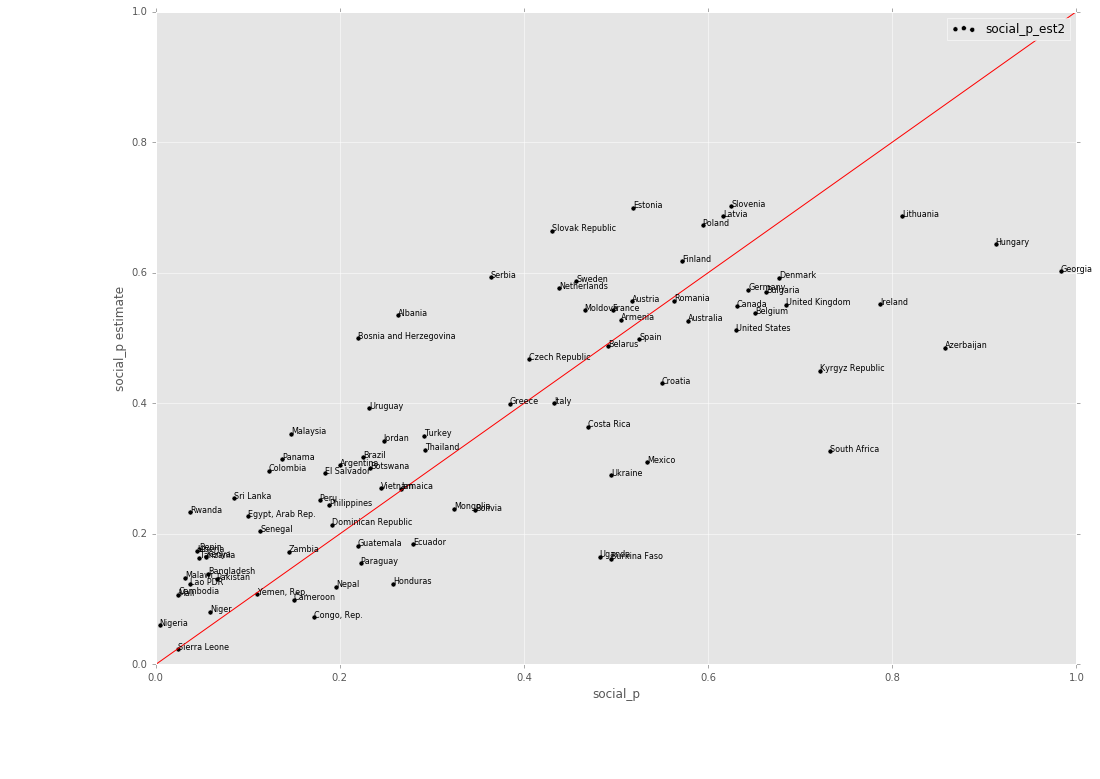

In [129]:
fig = plt.figure(figsize=[16.5,11.7])
#plt.scatter(df_stats['social_p'], df_stats['social_p_est1'], marker = 'o', s=30, c='k')
plt.scatter(df_stats['social_p'], df_stats['social_p_est2'], marker = 'o', s=25, c='k')
#plt.scatter(df_stats['social_p'], df_stats['social_p_est3'], marker = '^', s=30, c='g')
#plt.scatter(df_stats['social_p'], df_stats['social_p_est2_nofsr'], marker = 'x', s=30, c='b')
#plt.scatter(df_stats['social_p'], df_stats['social_p_est2_fsr'], marker = '+', s=30, c='b')

plt.plot(np.linspace(0,1.2), np.linspace(0,1.2),'r-')
#for k in df_stats.index.values:
#    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'social_p_est1']],
#                 s=k, xycoords='data', fontsize=8)
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'social_p_est2']],
                 s=k, xycoords='data', fontsize=8, color='k')
#for k in df_stats.index.values:
#    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'social_p_est3']],
#                 s=k, xycoords='data', fontsize=8, color='g')
#for k in df_stats.index.values:
#    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'social_p_est2_nofsr']],
#                 s=k, xycoords='data', fontsize=6, color='k')
#for k in df_stats.index.values:
#    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'social_p_est2_fsr']],
#                 s=k, xycoords='data', fontsize=6, color='k')
    
    plt.xlim([0,1.0]), plt.ylim([0.,1.0])
plt.xlabel('social_p'), plt.ylabel('social_p estimate'), plt.legend()
plt.savefig('social_p-ILO_social_regress_1.pdf', format='pdf', bbox_inches='tight')
plt.savefig('/Users/steffen/ownCloud/drucken/social_p-ILO_social_regress_2.pdf', format='pdf', bbox_inches='tight')

KeyError: 'social_r_est1'

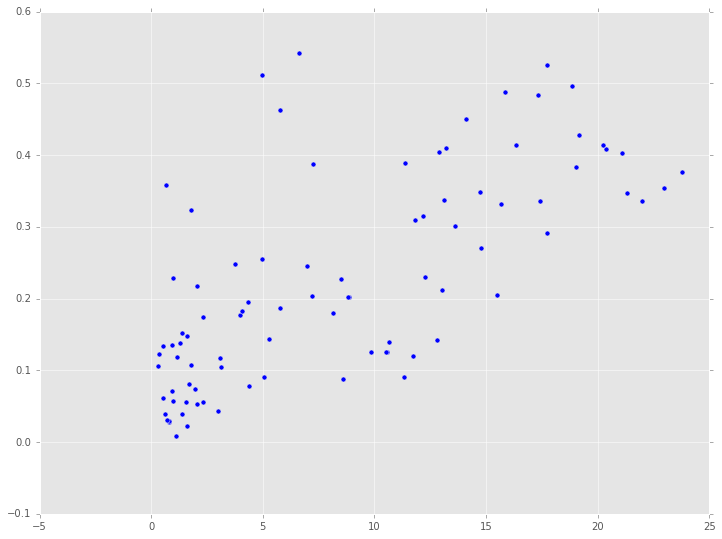

In [56]:
fig = plt.figure(figsize=[12,9])
plt.scatter(df_stats['ILO_social'], df_stats['social_r'], marker = 'o', s=25, c='b')
plt.scatter(df_stats['ILO_social'], df_stats['social_r_est1'], marker='^', s=25, c='r')
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'ILO_social'], df_stats.loc[k,'social_r']],
                 s=k, xycoords='data', fontsize=8)
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'ILO_social'], df_stats.loc[k,'social_r_est1']],
                 s=k, xycoords='data', fontsize=8, color='r')
plt.xlabel('ILO social spending'), plt.ylabel('social_r')
plt.xlim(0), plt.ylim(), plt.legend()
plt.savefig('social_r-ILO_social_regress_1.pdf', format='pdf')

In [ ]:
fig = plt.figure(figsize=[12,9])
plt.scatter(df_stats['GE_EST'], df_stats['social_p'], marker = 'o', s=25, c='b')
plt.scatter(df_stats['GE_EST'], df_stats['social_p_est1'], marker='^', s=25, c='r')
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'GE_EST'], df_stats.loc[k,'social_p']],
                 s=k, xycoords='data', fontsize=8)
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'GE_EST'], df_stats.loc[k,'social_p_est1']],
                 s=k, xycoords='data', fontsize=8, color='r')
plt.xlabel('Government Effectiveness'), plt.ylabel('social_p')
plt.xlim(), plt.ylim(), plt.legend()
plt.savefig('social_p-goveff_regress_1.pdf', format='pdf')

In [ ]:
fig = plt.figure(figsize=[12,9])
plt.scatter(df_stats['remittance_gdp'], df_stats['social_p'], marker = 'o', s=25, c='b')
plt.scatter(df_stats['remittance_gdp'], df_stats['social_p_est1'], marker='^', s=25, c='r')
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'remittance_gdp'], df_stats.loc[k,'social_p']],
                 s=k, xycoords='data', fontsize=8)
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'remittance_gdp'], df_stats.loc[k,'social_p_est1']],
                 s=k, xycoords='data', fontsize=8, color='r')
plt.xlabel('Remittances in percent of GDP'), plt.ylabel('social_p')
plt.xlim(0), plt.ylim(0), plt.legend()
plt.savefig('social_p-remittances_regress1.pdf', format='pdf')

In [ ]:
fig = plt.figure(figsize=[12,9])
plt.scatter(df_stats['social_p'], df_stats['GE_EST'], clip_on=False)
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'GE_EST']],
                 s=k, xycoords='data')
plt.xlabel('social_p'), plt.ylabel('WGI Governance Effectiveness')
plt.xlim(0), plt.ylim(), plt.legend()
plt.savefig('social_p-GE_EST.pdf', format='pdf')

In [ ]:
fig = plt.figure(figsize=[12,9])
plt.scatter(df_stats['social_p'], df_stats['ILO_social'], clip_on=False)
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'ILO_social']],
                 s=k, xycoords='data')
plt.xlabel('social_p'), plt.ylabel('ILO social spending')
plt.xlim(0), plt.ylim(0), plt.legend()
plt.savefig('social_p-ILO_social.pdf', format='pdf')

In [ ]:
fig1 = plt.figure(figsize=[12,9])
plt.scatter(df_stats['social_p'], df_stats['RQ_EST'], color='k', clip_on=False)

for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'RQ_EST']],
                 s=k, xycoords='data')

#plt.plot(ILO_data.loc[country_diff]['Public social protection (% GDP)'],
#         df_socprot_missing['social_p cont. lin. est. from ILO'], 'kx', mew=2, ms=10)

#plt.plot(x_grid, y_hat_lin_p, label="Linear", color = 'k', ls = '-', linewidth=2)
#plt.plot(x_grid, y_hat_plin_p, label="Piecewise linear", color = 'g', ls = '-', linewidth=2)
#plt.plot(x_grid, k0_p(x_grid), label="Nonparam., locally linear", color = 'blue', ls = '--', linewidth=2)


plt.xlabel('social_p')
plt.ylabel('WGI Regulatory Quality')
plt.xlim(0)
plt.legend()

In [ ]:
fig1 = plt.figure(figsize=[12,9])
plt.scatter(df_stats['CPI2015'], df_stats['GE_EST'], color='k', clip_on=False)

for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'CPI2015'], df_stats.loc[k,'GE_EST']],
                 s=k, xycoords='data')

#plt.plot(ILO_data.loc[country_diff]['Public social protection (% GDP)'],
#         df_socprot_missing['social_p cont. lin. est. from ILO'], 'kx', mew=2, ms=10)

#plt.plot(x_grid, y_hat_lin_p, label="Linear", color = 'k', ls = '-', linewidth=2)
#plt.plot(x_grid, y_hat_plin_p, label="Piecewise linear", color = 'g', ls = '-', linewidth=2)
#plt.plot(x_grid, k0_p(x_grid), label="Nonparam., locally linear", color = 'blue', ls = '--', linewidth=2)


plt.xlabel('TI Corruption Perception Index')
plt.ylabel('WGI Government Effectiveness')
plt.xlim(0)
plt.legend()

In [ ]:
fig1 = plt.figure(figsize=[12,9])
plt.scatter(df_stats['social_p'], df_stats['remittance_gdp'], color='k', clip_on=False)

for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'remittance_gdp']],
                 s=k, xycoords='data')

#plt.plot(ILO_data.loc[country_diff]['Public social protection (% GDP)'],
#         df_socprot_missing['social_p cont. lin. est. from ILO'], 'kx', mew=2, ms=10)

#plt.plot(x_grid, y_hat_lin_p, label="Linear", color = 'k', ls = '-', linewidth=2)
#plt.plot(x_grid, y_hat_plin_p, label="Piecewise linear", color = 'g', ls = '-', linewidth=2)
#plt.plot(x_grid, k0_p(x_grid), label="Nonparam., locally linear", color = 'blue', ls = '--', linewidth=2)


plt.xlabel('ILO social protection')
plt.ylabel('Remittances received in GDP')
plt.xlim(0)
plt.legend()